In [44]:
import sys
sys.path.append('../../')
import operator
import json
import os
import numpy as np
from utils import utils
json_file = "../../gtex_v8_metadata.json"
tissue_file = "/usr/users/fsimone/trans-eqtl-pipeline/analysis/plots/tissue_table.txt"
tshorts, tfulls_plain = utils.read_tissues(tissue_file, plain=True)
_, tfulls = utils.read_tissues(tissue_file)
with open(json_file) as instream:
    gtex_meta = json.load(instream)
tissue_colors  = dict()
tissue_names   = dict()
tissue_samples = dict()
for tshort, tfull in zip(tshorts, tfulls_plain):
    tissue_names[tshort] = tfull
for tshort, tfull in zip(tshorts, tfulls):
    tissue_colors[tshort] = "#" + gtex_meta[tfull.replace(" ", "_")]["colorHex"]
    tissue_samples[tshort] = gtex_meta[tfull.replace(" ", "_")]["rnaSeqAndGenotypeSampleCount"]

brain_tissues = ['bam','ban','bca','bceh','bce','bco','bfr','bhi','bhy','bnu','bpu','bsp','bsu']                 

In [45]:
import collections 
import re
import copy

DHSINFO_FIELDS = ['tissue', 'neqtl', 'ndhs', 'enrichment', 'pval']
class DhsInfo(collections.namedtuple('_DhsInfo', DHSINFO_FIELDS)):
    __slots__ = ()

def read_enrichments(filepath, ndhs_limit = 0):
    res = dict()
    res2 = collections.defaultdict(dict)
    with open(filepath) as instream:
        for line in instream:
            if re.match("tissue", line):
                continue
            arr = line.strip().split("\t")
            tissue = arr[0]
            neqtl = int(arr[3])
            ndhs  = int(arr[4])
            enrich = float(arr[5])
            enrichment = np.log2(enrich) if enrich > 0 else 0.0
            pval = float(arr[6])
            if ndhs > ndhs_limit:
                res[tissue] = DhsInfo(tissue=tissue, neqtl=neqtl, ndhs=ndhs, enrichment=enrichment, pval=pval)
                res2[tissue]['neqtl'] = neqtl
                res2[tissue]['ndhs']  = ndhs
                res2[tissue]['enrichment'] = enrichment
                res2[tissue]['pval'] = pval
            else:
                res[tissue] = DhsInfo(tissue=tissue, neqtl=neqtl, ndhs=ndhs, enrichment=0.0, pval=1.0)
                res2[tissue]['neqtl'] = neqtl
                res2[tissue]['ndhs']  = ndhs
                res2[tissue]['enrichment'] = 0.0
                res2[tissue]['pval'] = 1.0
    return res, res2

def read_enrichments_new(filepath, ndhs_limit = 0):
    res = dict()
    res2 = collections.defaultdict(dict)
    with open(filepath) as instream:
        for line in instream:
            if re.match("tissue", line):
                continue
            arr = line.strip().split("\t")
            tissue = arr[0]
            neqtl = int(arr[2])
            ndhs  = int(arr[3])
            enrich = float(arr[4])
            enrichment = np.log2(enrich) if enrich > 0 else 0.0
            pval = float(arr[5])
            if ndhs > ndhs_limit:
                res[tissue] = DhsInfo(tissue=tissue, neqtl=neqtl, ndhs=ndhs, enrichment=enrichment, pval=pval)
                res2[tissue]['neqtl'] = neqtl
                res2[tissue]['ndhs']  = ndhs
                res2[tissue]['enrichment'] = enrichment
                res2[tissue]['pval'] = pval
            else:
                res[tissue] = DhsInfo(tissue=tissue, neqtl=neqtl, ndhs=ndhs, enrichment=0.0, pval=1.0)
                res2[tissue]['neqtl'] = neqtl
                res2[tissue]['ndhs']  = ndhs
                res2[tissue]['enrichment'] = 0.0
                res2[tissue]['pval'] = 1.0
    return res, res2

def read_enrichments_new_less(filepath, ndhs_limit = 0):
    res = dict()
    res2 = collections.defaultdict(dict)
    with open(filepath) as instream:
        for line in instream:
            if re.match("tissue", line):
                continue
            arr = line.strip().split("\t")
            tissue = arr[0]
            neqtl = int(arr[1])
            ndhs  = int(arr[2])
            enrich = float(arr[3])
            enrichment = np.log2(enrich) if enrich > 0 else 0.0
            pval = float(arr[4])
            if ndhs > ndhs_limit:
                res[tissue] = DhsInfo(tissue=tissue, neqtl=neqtl, ndhs=ndhs, enrichment=enrichment, pval=pval)
                res2[tissue]['neqtl'] = neqtl
                res2[tissue]['ndhs']  = ndhs
                res2[tissue]['enrichment'] = enrichment
                res2[tissue]['pval'] = pval
            else:
                res[tissue] = DhsInfo(tissue=tissue, neqtl=neqtl, ndhs=ndhs, enrichment=0.0, pval=1.0)
                res2[tissue]['neqtl'] = neqtl
                res2[tissue]['ndhs']  = ndhs
                res2[tissue]['enrichment'] = 0.0
                res2[tissue]['pval'] = 1.0
    return res, res2

basedir = "/cbscratch/franco/trans-eqtl/dev-pipeline/"
path1 = basedir+"gtex_v8_pub_lncRNA/raw/summary_5e-08/dhs_enrichments/permnull_sb0.1_knn30_crossmap"
path2 = basedir+"gtex_v8_lncRNA_freeze/raw/summary_5e-08/dhs_enrichments/permnull_sb0.1_knn30"
path3 = basedir+"gtex_v8_pub_lncRNA_nogtknn/raw/summary_5e-08/dhs_enrichments/permnull_sb0.1_knn30_crossmap_nogtknn"
path4 = basedir+"gtex_v8_pub_lncRNA_nogtknn/raw/summary_5e-08/dhs_enrichments/permnull_sb0.1_knn30_nogtknn"
path5 = basedir+"gtex_v8_pub_lncRNA/raw_pub/summary_5e-08/dhs_enrichments/permnull_sb0.1_knn30_crossmap"
path6 = basedir+"gtex_v8_SHAPEIT2/raw_wasp/summary_5e-08/dhs_enrichments/permnull_sb0.1_knn30"

path7 = "/cbscratch/franco/trans-eqtl/protein_coding_lncRNA_gamma01_knn30_cut5e-8/dhs_enrichments/dhs_enrichment_multi_tissue_pc_lncRNA_gamma01_knn30_cut5e-8_ldpruned.txt"
path8 = basedir+"gtex_v8_SHAPEIT2/raw_pub/summary_5e-08/dhs_enrichments/permnull_sb0.1_knn30_crossmap"
path9 = basedir+"gtex_v8_SHAPEIT2/raw_pub/summary_5e-08/dhs_enrichments/permnull_sb0.1_knn30"
path10 = basedir+"gtex_v8_SHAPEIT2/raw/summary_5e-08/dhs_enrichments/permnull_sb0.1_knn30_nocismask"


target_file = "dhs_enrichment_multi_tissue_5e-08.txt.ld_prune"

res_ph_cm, res_ph_cm_dict = read_enrichments(os.path.join(path1, target_file)) 
res_ph, res_ph_dict = read_enrichments(os.path.join(path2, target_file)) 
res_ph_cm_nogtknn, res_ph_cm_nogtknn_dict = read_enrichments(os.path.join(path3, target_file)) 
res_ph_nogtknn, res_ph_nogtknn_dict = read_enrichments(os.path.join(path4, target_file))
res_pub_cm, res_pub_cm_dict = read_enrichments(os.path.join(path5, target_file))

res_wasp, res_wasp_dict = read_enrichments(os.path.join(path6, target_file))
res_sh2, res_sh2_dict = read_enrichments_new(os.path.join(path7))  # uses saikat's format
res_sh2_pub_cm, res_sh2_pub_cm_dict = read_enrichments_new_less(os.path.join(path8, target_file))
res_sh2_pub, res_sh2_pub_dict = read_enrichments_new_less(os.path.join(path9, target_file))
res_sh2_nocis, res_sh2_nocis_dict = read_enrichments_new_less(os.path.join(path10, target_file))


In [46]:
results_dict = dict()
results_dict["old_ph_cm"] = res_ph_cm_dict
results_dict["old_ph"] = res_ph_dict
# results_dict["old_ph_cm_nogtknn"] = res_ph_cm_nogtknn_dict
# results_dict["old_ph_nogtknn"] = res_ph_nogtknn_dict
results_dict["old_pub_cm"] = res_pub_cm_dict
results_dict["ph_wasp"] = res_wasp_dict
results_dict["ph"] = res_sh2_dict
results_dict["pub_cm"] = res_sh2_pub_cm_dict
results_dict["pub"] = res_sh2_pub_dict
results_dict["ph_nocis"] = res_sh2_nocis_dict

In [47]:
import json
json_dict = json.dumps(results_dict)
with open("phaser_pub_crossmap_enrichments.txt", 'w') as outstream:
    outstream.write(json_dict)

va not in dataset


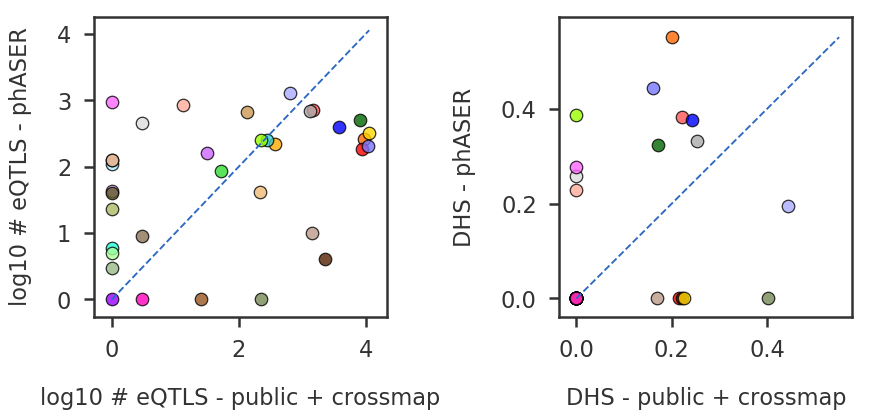

In [60]:
import matplotlib.pyplot as plt
from utils import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 18, colors = 'banskt', dpi = 90)

res1 = copy.copy(res_sh2_pub_cm)
res2 = copy.copy(res_sh2)
neqtl1 = []
neqtl2 = []
ts_indata = list()
for ts in tshorts:
    if ts not in brain_tissues:
        if ts not in res1 and ts not in res2:
            print(f"{ts} not in dataset")
            continue
        else:
            neqtl1.append(np.log10(res1[ts].neqtl) if ts in res1 else 0)
            neqtl2.append(np.log10(res2[ts].neqtl) if ts in res2 else 0)
            ts_indata.append(ts)

enrich1 = []  # crossmap phaser
enrich2 = []  # regular  phaser
ts_color = dict()
ed_color = dict()
ts_alpha = dict()
pval_c = 0.05
for ts in ts_indata:
    if ts not in brain_tissues:
        ts_color[ts] = tissue_colors[ts]
        ts_alpha[ts] = 0.9
        ed_color[ts] = "face"
        enrich1.append(res1[ts].enrichment if ts in res1 and res1[ts].pval < pval_c else 0)
        enrich2.append(res2[ts].enrichment if ts in res2 and res2[ts].pval < pval_c else 0)
    
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
for i, ts in enumerate(ts_indata):
    ax1.scatter(neqtl1[i], neqtl2[i], s=100, color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
ax1.plot([0,max(neqtl1+ neqtl2)],[0,max(neqtl1+ neqtl2)], linestyle="--")
ax1.set_xlabel("log10 # eQTLS - public + crossmap")
ax1.set_ylabel("log10 # eQTLS - phASER")


ax2 = fig.add_subplot(122)
for i, ts in enumerate(ts_indata):
    ax2.scatter(enrich1[i], enrich2[i], s=100, color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
ax2.plot([0,max(enrich1+enrich2)],[0,max(enrich1+enrich2)], linestyle="--")
ax2.set_xlabel("DHS - public + crossmap")
ax2.set_ylabel("DHS - phASER")


plt.tight_layout()
plt.show()


va not in dataset


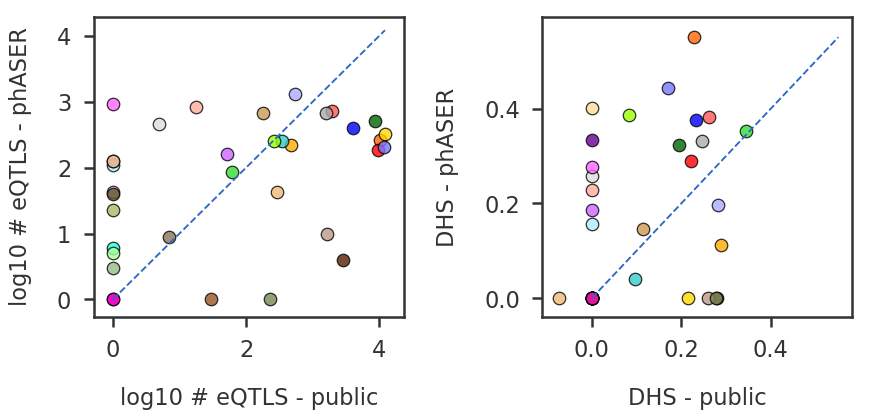

In [37]:
import matplotlib.pyplot as plt
from utils import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 18, colors = 'banskt', dpi = 90)

res1 = copy.copy(res_sh2_pub)
res2 = copy.copy(res_sh2)
neqtl1 = []
neqtl2 = []
ts_indata = list()
for ts in tshorts:
    if ts not in brain_tissues:
        if ts not in res1 and ts not in res2:
            print(f"{ts} not in dataset")
            continue
        else:
            neqtl1.append(np.log10(res1[ts].neqtl) if ts in res1 else 0)
            neqtl2.append(np.log10(res2[ts].neqtl) if ts in res2 else 0)
            ts_indata.append(ts)

enrich1 = []  # crossmap phaser
enrich2 = []  # regular  phaser
ts_color = dict()
ed_color = dict()
ts_alpha = dict()
pval_c = 1
for ts in ts_indata:
    if ts not in brain_tissues:
        ts_color[ts] = tissue_colors[ts]
        ts_alpha[ts] = 0.9
        ed_color[ts] = "face"
        enrich1.append(res1[ts].enrichment if ts in res1 and res1[ts].pval < pval_c else 0)
        enrich2.append(res2[ts].enrichment if ts in res2 and res2[ts].pval < pval_c else 0)
    
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
for i, ts in enumerate(ts_indata):
    ax1.scatter(neqtl1[i], neqtl2[i], s=100, color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
ax1.plot([0,max(neqtl1+ neqtl2)],[0,max(neqtl1+ neqtl2)], linestyle="--")
ax1.set_xlabel("log10 # eQTLS - public")
ax1.set_ylabel("log10 # eQTLS - phASER")


ax2 = fig.add_subplot(122)
for i, ts in enumerate(ts_indata):
    ax2.scatter(enrich1[i], enrich2[i], s=100, color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
ax2.plot([0,max(enrich1+enrich2)],[0,max(enrich1+enrich2)], linestyle="--")
ax2.set_xlabel("DHS - public")
ax2.set_ylabel("DHS - phASER")


plt.tight_layout()
plt.show()


fib not in dataset
hlv not in dataset
kc not in dataset
liv not in dataset
msg not in dataset
pit not in dataset
sto not in dataset
ut not in dataset
va not in dataset


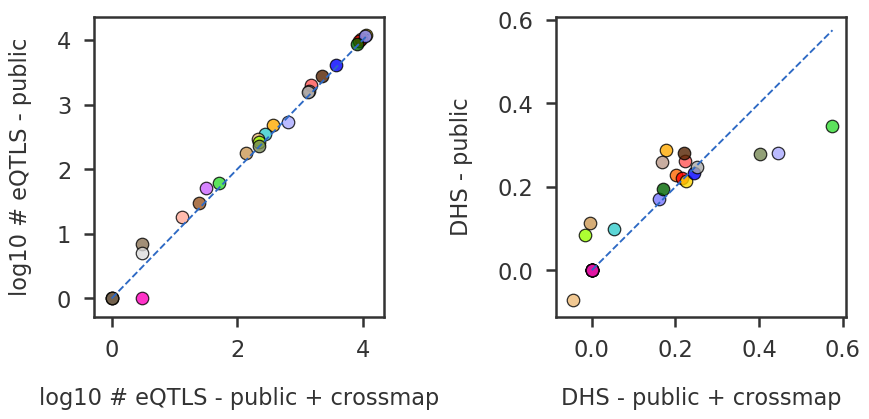

In [38]:
import matplotlib.pyplot as plt
from utils import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 18, colors = 'banskt', dpi = 90)

res1 = copy.copy(res_sh2_pub_cm)
res2 = copy.copy(res_sh2_pub)
neqtl1 = []
neqtl2 = []
ts_indata = list()
for ts in tshorts:
    if ts not in brain_tissues:
        if ts not in res1 and ts not in res2:
            print(f"{ts} not in dataset")
            continue
        else:
            neqtl1.append(np.log10(res1[ts].neqtl) if ts in res1 else 0)
            neqtl2.append(np.log10(res2[ts].neqtl) if ts in res2 else 0)
            ts_indata.append(ts)

enrich1 = []  # crossmap phaser
enrich2 = []  # regular  phaser
ts_color = dict()
ed_color = dict()
ts_alpha = dict()
pval_c = 1
for ts in ts_indata:
    if ts not in brain_tissues:
        ts_color[ts] = tissue_colors[ts]
        ts_alpha[ts] = 0.9
        ed_color[ts] = "face"
        enrich1.append(res1[ts].enrichment if ts in res1 and res1[ts].pval < pval_c else 0)
        enrich2.append(res2[ts].enrichment if ts in res2 and res2[ts].pval < pval_c else 0)
    
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
for i, ts in enumerate(ts_indata):
    ax1.scatter(neqtl1[i], neqtl2[i], s=100, color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
ax1.plot([0,max(neqtl1+ neqtl2)],[0,max(neqtl1+ neqtl2)], linestyle="--")
ax1.set_xlabel("log10 # eQTLS - public + crossmap")
ax1.set_ylabel("log10 # eQTLS - public")


ax2 = fig.add_subplot(122)
for i, ts in enumerate(ts_indata):
    ax2.scatter(enrich1[i], enrich2[i], s=100, color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
ax2.plot([0,max(enrich1+enrich2)],[0,max(enrich1+enrich2)], linestyle="--")
ax2.set_xlabel("DHS - public + crossmap")
ax2.set_ylabel("DHS - public")


plt.tight_layout()
plt.show()


wb not in dataset


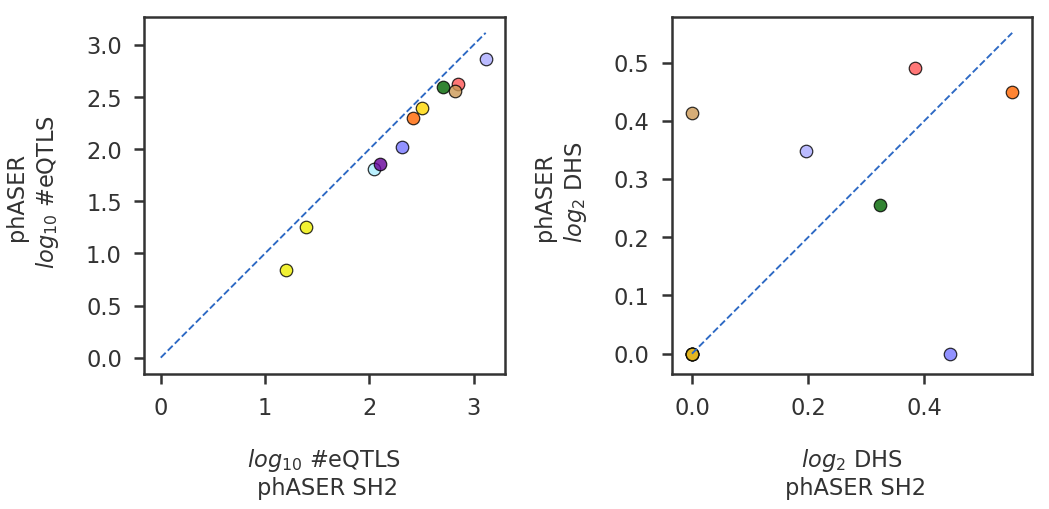

In [119]:
res1 = copy.copy(res_sh2)
res2 = copy.copy(res_ph)
neqtl1 = []
neqtl2 = []
ts_indata = list()
for ts in tshorts:
    if ts not in res1 and ts not in res2:
        print(f"{ts} not in dataset")
        continue
    else:
        neqtl1.append(np.log10(res1[ts].neqtl) if ts in res1 else 0)
        neqtl2.append(np.log10(res2[ts].neqtl) if ts in res2 else 0)
        ts_indata.append(ts)

enrich1 = []  # crossmap phaser
enrich2 = []  # regular  phaser
ts_color = dict()
ed_color = dict()
ts_alpha = dict()
pval_c = 0.05
for ts in ts_indata:
    ts_color[ts] = tissue_colors[ts]
    ts_alpha[ts] = 0.9
    ed_color[ts] = "face"
    enrich1.append(res1[ts].enrichment if ts in res1 and res1[ts].pval < pval_c else 0)
    enrich2.append(res2[ts].enrichment if ts in res2 and res2[ts].pval < pval_c else 0)
    
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
for i, ts in enumerate(ts_indata):
    ax1.scatter(neqtl1[i], neqtl2[i], s=100, color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
ax1.plot([0,max(neqtl1+ neqtl2)],[0,max(neqtl1+ neqtl2)], linestyle="--")
ax1.set_xlabel("$log_{10}$ #eQTLS \n phASER SH2")
ax1.set_ylabel("phASER \n $log_{10}$ #eQTLS")


ax2 = fig.add_subplot(122)
for i, ts in enumerate(ts_indata):
    ax2.scatter(enrich1[i], enrich2[i], s=100, color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
ax2.plot([0,max(enrich1+enrich2)],[0,max(enrich1+enrich2)], linestyle="--")
ax2.set_xlabel("$log_2$ DHS \n phASER SH2")
ax2.set_ylabel("phASER \n $log_2$ DHS")


plt.tight_layout()
plt.show()


haa not in dataset
pan not in dataset
va not in dataset
wb not in dataset


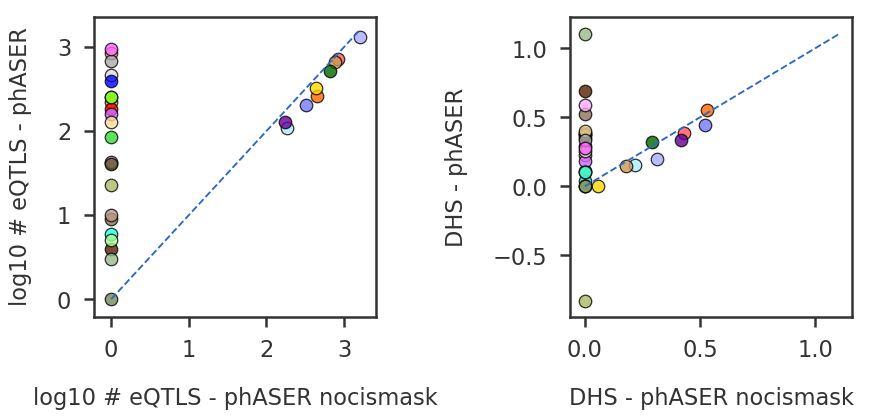

In [48]:
res1 = copy.copy(res_sh2_nocis)
res2 = copy.copy(res_sh2)
neqtl1 = []
neqtl2 = []
ts_indata = list()
for ts in tshorts:
    if ts not in brain_tissues:
        if ts not in res1 and ts not in res2:
            print(f"{ts} not in dataset")
            continue
        else:
            neqtl1.append(np.log10(res1[ts].neqtl) if ts in res1 else 0)
            neqtl2.append(np.log10(res2[ts].neqtl) if ts in res2 else 0)
            ts_indata.append(ts)

enrich1 = []  # crossmap phaser
enrich2 = []  # regular  phaser
ts_color = dict()
ed_color = dict()
ts_alpha = dict()
pval_c = 1
for ts in ts_indata:
    if ts not in brain_tissues:
        ts_color[ts] = tissue_colors[ts]
        ts_alpha[ts] = 0.9
        ed_color[ts] = "face"
        enrich1.append(res1[ts].enrichment if ts in res1 and res1[ts].pval < pval_c else 0)
        enrich2.append(res2[ts].enrichment if ts in res2 and res2[ts].pval < pval_c else 0)
    
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
for i, ts in enumerate(ts_indata):
    ax1.scatter(neqtl1[i], neqtl2[i], s=100, color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
ax1.plot([0,max(neqtl1+ neqtl2)],[0,max(neqtl1+ neqtl2)], linestyle="--")
ax1.set_xlabel("log10 # eQTLS - phASER nocismask")
ax1.set_ylabel("log10 # eQTLS - phASER")


ax2 = fig.add_subplot(122)
for i, ts in enumerate(ts_indata):
    ax2.scatter(enrich1[i], enrich2[i], s=100, color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
ax2.plot([0,max(enrich1+enrich2)],[0,max(enrich1+enrich2)], linestyle="--")
ax2.set_xlabel("DHS - phASER nocismask")
ax2.set_ylabel("DHS - phASER")


plt.tight_layout()
plt.show()


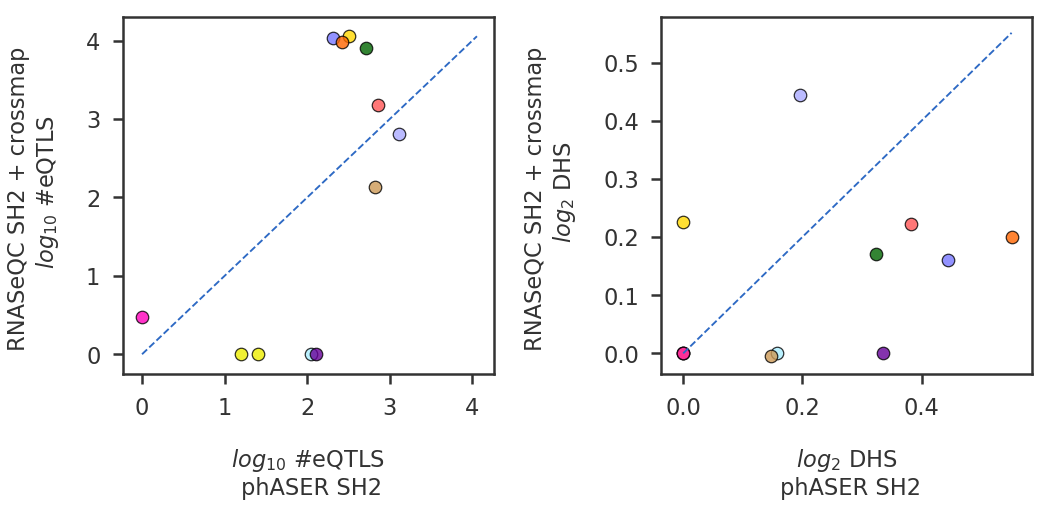

In [120]:
res1 = copy.copy(res_sh2)
res2 = copy.copy(res_sh2_pub_cm)
neqtl1 = []
neqtl2 = []
ts_indata = list()
for ts in tshorts:
    if ts not in res1 and ts not in res2:
        print(f"{ts} not in dataset")
        continue
    else:
        neqtl1.append(np.log10(res1[ts].neqtl) if ts in res1 else 0)
        neqtl2.append(np.log10(res2[ts].neqtl) if ts in res2 else 0)
        ts_indata.append(ts)

enrich1 = []  # crossmap phaser
enrich2 = []  # regular  phaser
ts_color = dict()
ed_color = dict()
ts_alpha = dict()
pval_c = 1
for ts in ts_indata:
    ts_color[ts] = tissue_colors[ts]
    ts_alpha[ts] = 0.9
    ed_color[ts] = "face"
    enrich1.append(res1[ts].enrichment if ts in res1 and res1[ts].pval < pval_c else 0)
    enrich2.append(res2[ts].enrichment if ts in res2 and res2[ts].pval < pval_c else 0)
    
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
for i, ts in enumerate(ts_indata):
    ax1.scatter(neqtl1[i], neqtl2[i], s=100, color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
ax1.plot([0,max(neqtl1+ neqtl2)],[0,max(neqtl1+ neqtl2)], linestyle="--")
ax1.set_xlabel("$log_{10}$ #eQTLS \n phASER SH2")
ax1.set_ylabel("RNASeQC SH2 + crossmap \n $log_{10}$ #eQTLS")


ax2 = fig.add_subplot(122)
for i, ts in enumerate(ts_indata):
    ax2.scatter(enrich1[i], enrich2[i], s=100, color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
ax2.plot([0,max(enrich1+enrich2)],[0,max(enrich1+enrich2)], linestyle="--")
ax2.set_xlabel("$log_2$ DHS \n phASER SH2")
ax2.set_ylabel("RNASeQC SH2 + crossmap \n $log_2$ DHS")


plt.tight_layout()
plt.show()


wb not in dataset


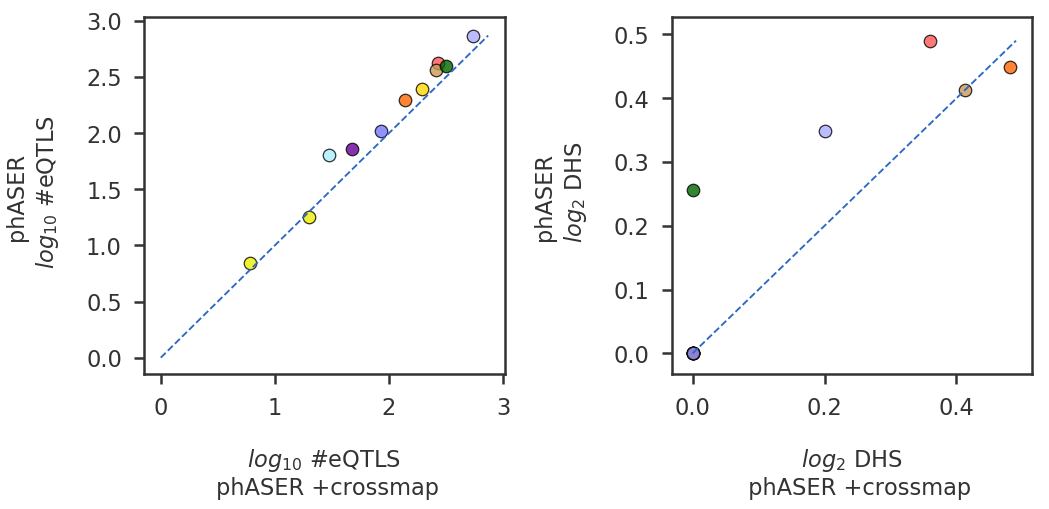

In [124]:
res1 = copy.copy(res_ph_cm)
res2 = copy.copy(res_ph)
neqtl1 = []
neqtl2 = []
ts_indata = list()
for ts in tshorts:
    if ts not in res1 and ts not in res2:
        print(f"{ts} not in dataset")
        continue
    else:
        neqtl1.append(np.log10(res1[ts].neqtl) if ts in res1 else 0)
        neqtl2.append(np.log10(res2[ts].neqtl) if ts in res2 else 0)
        ts_indata.append(ts)

enrich1 = []
enrich2 = []
ts_color = dict()
ed_color = dict()
ts_alpha = dict()
pval_c = 0.05
for ts in ts_indata:
    ts_color[ts] = tissue_colors[ts]
    ts_alpha[ts] = 0.9
    ed_color[ts] = "face"
    enrich1.append(res1[ts].enrichment if ts in res1 and res1[ts].pval < pval_c else 0)
    enrich2.append(res2[ts].enrichment if ts in res2 and res2[ts].pval < pval_c else 0)
    
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
for i, ts in enumerate(ts_indata):
    ax1.scatter(neqtl1[i], neqtl2[i], s=100, color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
ax1.plot([0,max(neqtl1+ neqtl2)],[0,max(neqtl1+ neqtl2)], linestyle="--")
ax1.set_xlabel("$log_{10}$ #eQTLS \n phASER +crossmap")
ax1.set_ylabel("phASER \n $log_{10}$ #eQTLS")


ax2 = fig.add_subplot(122)
for i, ts in enumerate(ts_indata):
    ax2.scatter(enrich1[i], enrich2[i], s=100, color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
ax2.plot([0,max(enrich1+enrich2)],[0,max(enrich1+enrich2)], linestyle="--")
ax2.set_xlabel("$log_2$ DHS \n  phASER +crossmap")
ax2.set_ylabel("phASER \n $log_2$ DHS")


plt.tight_layout()
plt.show()


wb not in dataset


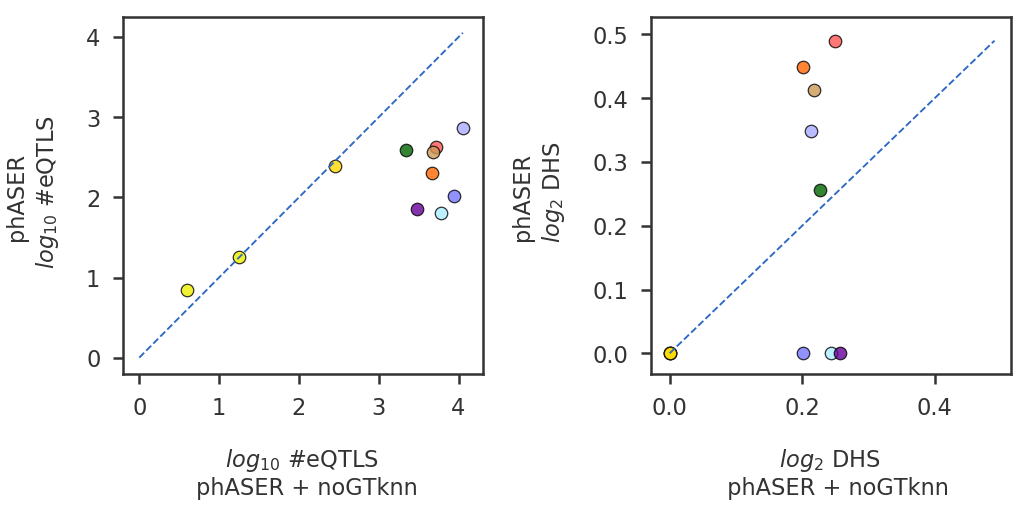

In [125]:
res1 = copy.copy(res_ph_nogtknn)
res2 = copy.copy(res_ph)
neqtl1 = []
neqtl2 = []
ts_indata = list()
for ts in tshorts:
    if ts not in res1 and ts not in res2:
        print(f"{ts} not in dataset")
        continue
    else:
        neqtl1.append(np.log10(res1[ts].neqtl) if ts in res1 else 0)
        neqtl2.append(np.log10(res2[ts].neqtl) if ts in res2 else 0)
        ts_indata.append(ts)

enrich1 = []
enrich2 = []
ts_color = dict()
ed_color = dict()
ts_alpha = dict()
pval_c = 0.05
for ts in ts_indata:
    ts_color[ts] = tissue_colors[ts]
    ts_alpha[ts] = 0.9
    ed_color[ts] = "face"
    enrich1.append(res1[ts].enrichment if ts in res1 and res1[ts].pval < pval_c else 0)
    enrich2.append(res2[ts].enrichment if ts in res2 and res2[ts].pval < pval_c else 0)
    
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
for i, ts in enumerate(ts_indata):
    ax1.scatter(neqtl1[i], neqtl2[i], s=100, color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
ax1.plot([0,max(neqtl1+ neqtl2)],[0,max(neqtl1+ neqtl2)], linestyle="--")
ax1.set_xlabel("$log_{10}$ #eQTLS \n phASER + noGTknn")
ax1.set_ylabel("phASER \n $log_{10}$ #eQTLS")


ax2 = fig.add_subplot(122)
for i, ts in enumerate(ts_indata):
    ax2.scatter(enrich1[i], enrich2[i], s=100, color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
ax2.plot([0,max(enrich1+enrich2)],[0,max(enrich1+enrich2)], linestyle="--")
ax2.set_xlabel("$log_2$ DHS \n  phASER + noGTknn")
ax2.set_ylabel("phASER \n $log_2$ DHS")


plt.tight_layout()
plt.show()


wb not in dataset


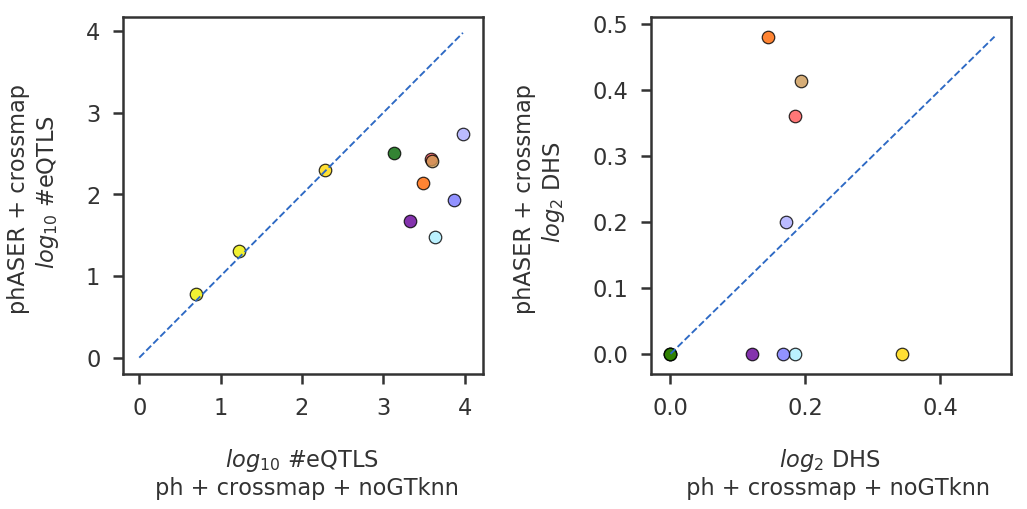

In [126]:
res1 = copy.copy(res_ph_cm_nogtknn)
res2 = copy.copy(res_ph_cm)
neqtl1 = []
neqtl2 = []
ts_indata = list()
for ts in tshorts:
    if ts not in res1 and ts not in res2:
        print(f"{ts} not in dataset")
        continue
    else:
        neqtl1.append(np.log10(res1[ts].neqtl) if ts in res1 else 0)
        neqtl2.append(np.log10(res2[ts].neqtl) if ts in res2 else 0)
        ts_indata.append(ts)

enrich1 = []
enrich2 = []
ts_color = dict()
ed_color = dict()
ts_alpha = dict()
pval_c = 0.05
for ts in ts_indata:
    ts_color[ts] = tissue_colors[ts]
    ts_alpha[ts] = 0.9
    ed_color[ts] = "face"
    enrich1.append(res1[ts].enrichment if ts in res1 and res1[ts].pval < pval_c else 0)
    enrich2.append(res2[ts].enrichment if ts in res2 and res2[ts].pval < pval_c else 0)
    
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
for i, ts in enumerate(ts_indata):
    ax1.scatter(neqtl1[i], neqtl2[i], s=100, color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
ax1.plot([0,max(neqtl1+ neqtl2)],[0,max(neqtl1+ neqtl2)], linestyle="--")
ax1.set_xlabel("$log_{10}$ #eQTLS \n ph + crossmap + noGTknn")
ax1.set_ylabel("phASER + crossmap \n $log_{10}$ #eQTLS")


ax2 = fig.add_subplot(122)
for i, ts in enumerate(ts_indata):
    ax2.scatter(enrich1[i], enrich2[i], s=100, color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
ax2.plot([0,max(enrich1+enrich2)],[0,max(enrich1+enrich2)], linestyle="--")
ax2.set_xlabel("$log_2$ DHS \n  ph + crossmap + noGTknn")
ax2.set_ylabel("phASER + crossmap \n $log_2$ DHS")

plt.tight_layout()
plt.show()



wb not in dataset


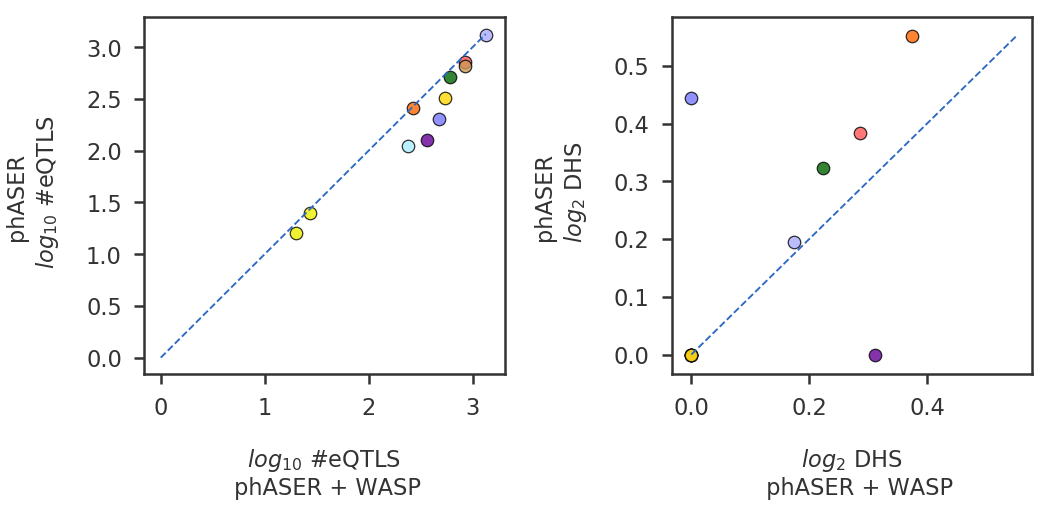

In [128]:
res1 = copy.copy(res_wasp)
res2 = copy.copy(res_sh2) #ph)
neqtl1 = []
neqtl2 = []
ts_indata = list()
for ts in tshorts:
    if ts not in res1 and ts not in res2:
        print(f"{ts} not in dataset")
        continue
    else:
        neqtl1.append(np.log10(res1[ts].neqtl) if ts in res1 else 0)
        neqtl2.append(np.log10(res2[ts].neqtl) if ts in res2 else 0)
        ts_indata.append(ts)

enrich1 = []
enrich2 = []
ts_color = dict()
ed_color = dict()
ts_alpha = dict()
pval_c = 0.05
for ts in ts_indata:
    ts_color[ts] = tissue_colors[ts]
    ts_alpha[ts] = 0.9
    ed_color[ts] = "face"
    enrich1.append(res1[ts].enrichment if ts in res1 and res1[ts].pval < pval_c else 0)
    enrich2.append(res2[ts].enrichment if ts in res2 and res2[ts].pval < pval_c else 0)
    
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
for i, ts in enumerate(ts_indata):
    ax1.scatter(neqtl1[i], neqtl2[i], s=100, color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
ax1.plot([0,max(neqtl1+ neqtl2)],[0,max(neqtl1+ neqtl2)], linestyle="--")
ax1.set_xlabel("$log_{10}$ #eQTLS \n phASER + WASP")
ax1.set_ylabel("phASER \n $log_{10}$ #eQTLS")


ax2 = fig.add_subplot(122)
for i, ts in enumerate(ts_indata):
    ax2.scatter(enrich1[i], enrich2[i], s=100, color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
ax2.plot([0,max(enrich1+enrich2)],[0,max(enrich1+enrich2)], linestyle="--")
ax2.set_xlabel("$log_2$ DHS \n  phASER + WASP")
ax2.set_ylabel("phASER \n $log_2$ DHS")

plt.tight_layout()
plt.show()
